In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE

## Svm_margin_plot

In [80]:
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y):



    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')


    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

# Task: 1

In [81]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Assign the correct column names based on the dataset documentation
columns = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset and assign these column names
data = pd.read_csv(url, header=None, names=columns)
data.drop(columns=['ID'], inplace=True)


In [82]:
data.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
data.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [84]:
encoder = OrdinalEncoder(categories=[['M', 'B']])
data['Diagnosis'] = encoder.fit_transform(data[['Diagnosis']])

In [85]:
data.Diagnosis.value_counts()

Diagnosis
1.0    357
0.0    212
Name: count, dtype: int64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [87]:
data.describe()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [88]:
# I selected the two features by using a "for loop" to plot a scatterplot of each feature against 'radius_mean'.
# I found that 'concave points_mean' was one of the best features to use with SVM or LR models.

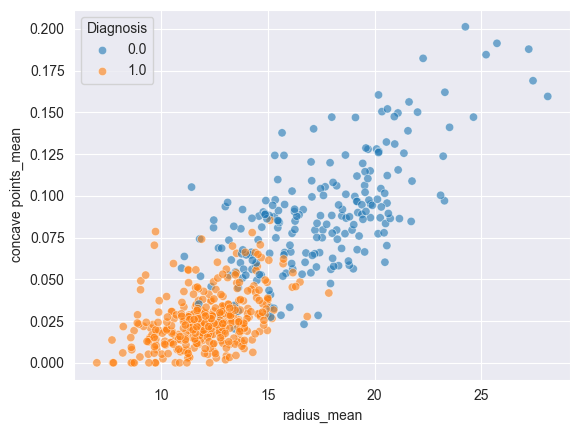

In [89]:
sns.scatterplot(data, x='radius_mean', y='concave points_mean' , hue='Diagnosis', alpha=0.6)
plt.show()

In [90]:
x = data[['radius_mean', 'concave points_mean']]
y = data['Diagnosis']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)


### **Logistic Regression**

In [92]:
model_log = LogisticRegression()
model_log.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [93]:
y_pred = model_log.predict(x_test)

In [94]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[36  7]
 [ 2 69]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        43
         1.0       0.91      0.97      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



### SVM

In [95]:
model_svm = SVC()
model_svm.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [96]:
y_pred=model_svm.predict(x_test)

In [97]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[35  8]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90        43
         1.0       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



# Task: 2

In [98]:
x = data[['radius_mean', 'concave points_mean']]
y = data['Diagnosis']

In [99]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=400, shuffle=True, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=69, random_state=42)

In [100]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [101]:
data.corr(numeric_only = True)['Diagnosis'].sort_values()

concave points_worst      -0.793566
perimeter_worst           -0.782914
concave points_mean       -0.776614
radius_worst              -0.776454
perimeter_mean            -0.742636
area_worst                -0.733825
radius_mean               -0.730029
area_mean                 -0.708984
concavity_mean            -0.696360
concavity_worst           -0.659610
compactness_mean          -0.596534
compactness_worst         -0.590998
radius_se                 -0.567134
perimeter_se              -0.556141
area_se                   -0.548236
texture_worst             -0.456903
smoothness_worst          -0.421465
symmetry_worst            -0.416294
texture_mean              -0.415185
concave points_se         -0.408042
smoothness_mean           -0.358560
symmetry_mean             -0.330499
fractal_dimension_worst   -0.323872
compactness_se            -0.292999
concavity_se              -0.253730
fractal_dimension_se      -0.077972
symmetry_se                0.006522
texture_se                 0

In [102]:
# Remove : any feature -> correlation  (< 0.2).
# Remove : Any feature that is similar to another feature with a lower correlation coefficient.

In [103]:
data = data.drop(columns=['fractal_dimension_se', 'symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se'])


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_se                569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

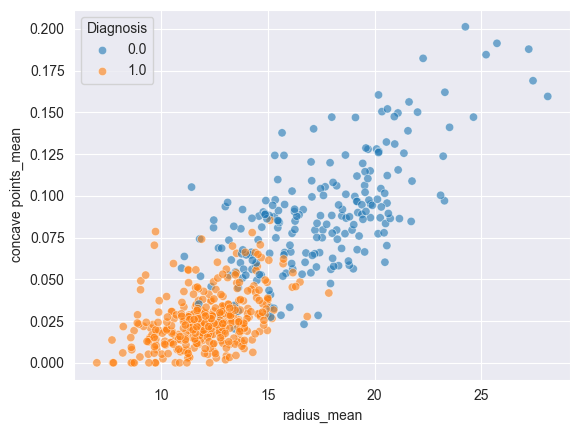

In [105]:
sns.scatterplot(data, x='radius_mean', y='concave points_mean' , hue='Diagnosis', alpha=0.6)
plt.show()

# Task 3

In [106]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train , y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [107]:
y_pred = model_linear.predict(x_test)

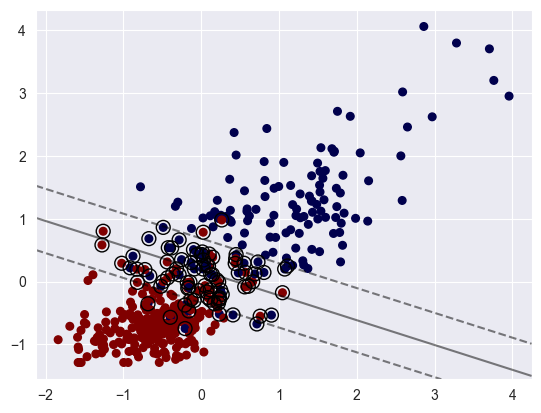

In [108]:
plot_svm_boundary(model_linear, x_train , y_train)

In [109]:
# The data cannot be separated linearly because there are too many misclassifications.

In [110]:
model_rbf = SVC(kernel='rbf' , gamma=.1)
model_rbf.fit(x_train , y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


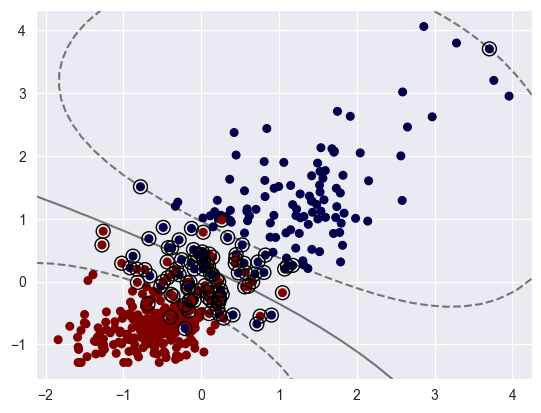

In [111]:
plot_svm_boundary(model_rbf, x_train , y_train)

In [112]:
# There isn't a significant difference between using 'kernel='rbf'' and 'kernel='linear''.
# This is because most of the data is highly overlapping.

In [113]:
model_poly = SVC(kernel='poly' , degree=3)
model_poly.fit(x_train , y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


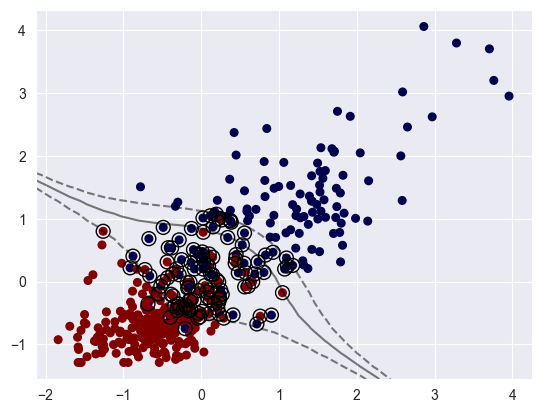

In [114]:
plot_svm_boundary(model_poly, x_train , y_train)

In [115]:
y_pred = model_poly.predict(x_test)

In [116]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[17  5]
 [ 0 47]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        22
         1.0       0.90      1.00      0.95        47

    accuracy                           0.93        69
   macro avg       0.95      0.89      0.91        69
weighted avg       0.93      0.93      0.92        69



In [117]:
model = SVC()

parameters ={
    'kernel':['linear' , 'poly' , 'rbf'],
    'C' : [0.01, 0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1]
    }

grid = GridSearchCV(model , parameters)

In [118]:
grid.fit(x_train , y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'gamma': [0.001, 0.01, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [119]:
best_model = grid.best_estimator_

In [120]:
y_pred = best_model.predict(x_test)

# Task: 4

In [121]:
x = data[['radius_mean', 'concave points_mean']]
y = data['Diagnosis']

In [122]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=400, shuffle=True, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=69, random_state=42)

In [123]:
# Measure the training and prediction times

In [124]:
import time

In [125]:
# Case 1 :

n = int(0.1 * len(x_train))
X_small = x_train[:n]
y_small = y_train[:n]

time_start = time.time()

model_linear = SVC(kernel='linear', C=1)
model_linear.fit(X_small , y_small)
y_pred = model_linear.predict(x_test)

time_of_cass1 = time.time() - time_start
print("Time of cass 1: ", time_of_cass1)

Time of cass 1:  0.002743959426879883


In [126]:
# Case 2 :

time_start = time.time()

model_linear = SVC(kernel='linear', C=1)
model_linear.fit(x_train , y_train)
y_pred = model_linear.predict(x_test)

time_of_cass2 = time.time() - time_start
print("Time of cass 1: ", time_of_cass2)

Time of cass 1:  0.004990339279174805


In [127]:
# Case 3 :

n = int(0.1 * len(x_train))
X_small = x_train[:n]
y_small = y_train[:n]

time_start = time.time()

model_rdf = SVC(kernel='rbf', C=1, gamma=0.01)
model_rdf.fit(X_small , y_small)
y_pred = model_rdf.predict(x_test)

time_of_cass3 = time.time() - time_start
print("Time of cass 1: ", time_of_cass3)

Time of cass 1:  0.004136323928833008


In [128]:
# Case 4 :

time_start = time.time()

model_rdf = SVC(kernel='rbf', C=1, gamma=0.01)
model_rdf.fit(x_train , y_train)
y_pred = model_rdf.predict(x_test)

time_of_cass4 = time.time() - time_start
print("Time of cass 1: ", time_of_cass4)

Time of cass 1:  0.004519939422607422


In [129]:
list_of_time = [time_of_cass1, time_of_cass2, time_of_cass3, time_of_cass4]

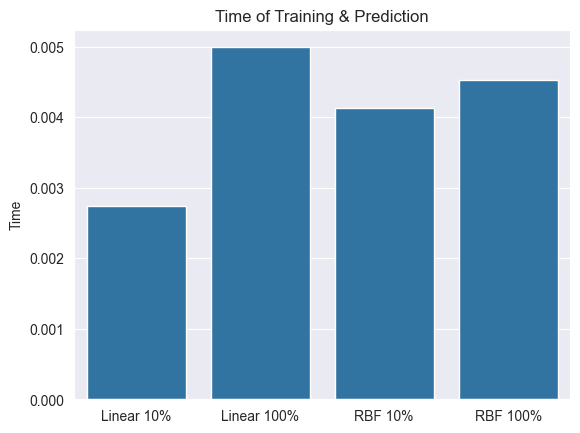

In [130]:
sns.barplot(x=["Linear 10%", "Linear 100%", "RBF 10%", "RBF 100%"], y=list_of_time)
plt.ylabel("Time")
plt.title("Time of Training & Prediction")
plt.show()

# Task: 5

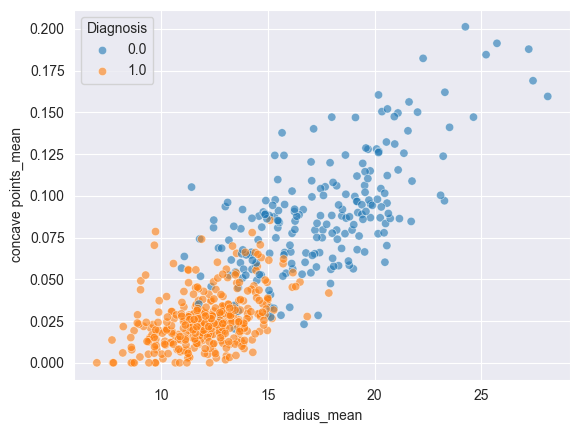

In [131]:
sns.scatterplot(data, x='radius_mean', y='concave points_mean' , hue='Diagnosis', alpha=0.6)
plt.show()

### Overlapping Classes

In [132]:
x_train_overlap = x_train.copy()
y_train_overlap = y_train.copy()


indices = np.where(y_train_overlap == 5)[0]
np.random.shuffle(indices)
n_overlap = int(0.2 * len(indices))

x_train_overlap[indices[:n_overlap]] += np.random.normal(0, 0.5, size=x_train_overlap[indices[:n_overlap]].shape)


model_overlap = SVC(kernel='linear', C=1)
model_overlap.fit(x_train_overlap, y_train_overlap)

y_pred_overlap = model_overlap.predict(x_test)


accuracy_overlap = accuracy_score(y_test, y_pred_overlap)
print("Accuracy with overlapping classes:", accuracy_overlap)


Accuracy with overlapping classes: 0.9565217391304348


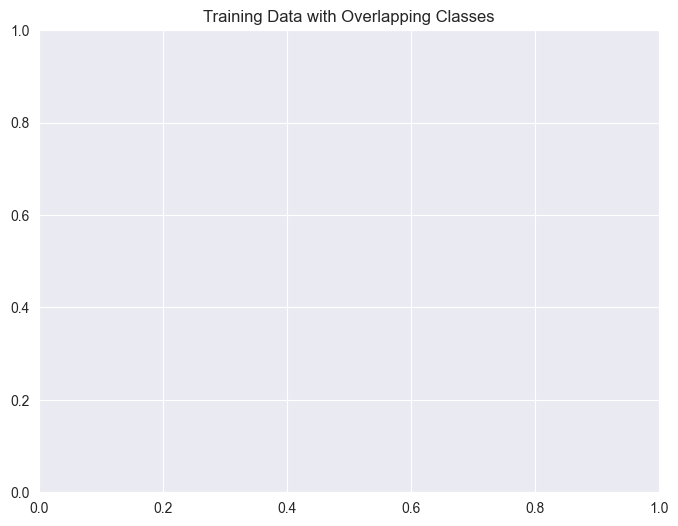

In [133]:
df_overlap = pd.DataFrame(x_train_overlap, columns=[f"feature_{i}" for i in range(x_train_overlap.shape[1])])
df_overlap['target'] = y_train_overlap

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_overlap, x='feature_0', y='feature_1', hue='target', palette='tab10', alpha=0.6)
plt.title("Training Data with Overlapping Classes")
plt.show()


In [134]:
x_train_noisy = x_train.copy()
y_train_noisy = y_train.copy()

n_noisy = int(0.1 * len(x_train_noisy))
indices_noisy = np.random.choice(len(x_train_noisy), n_noisy, replace=False)

x_train_noisy[indices_noisy] += np.random.normal(0, 0.5, size=x_train_noisy[indices_noisy].shape)

model_rbf = SVC(kernel='rbf', C=1, gamma=0.01)
model_rbf.fit(x_train_noisy, y_train_noisy)


y_pred_val = model_rbf.predict(x_val)
y_pred_test = model_rbf.predict(x_test)

accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on noisy data - Validation:", accuracy_val)
print("Accuracy on noisy data - Test:", accuracy_test)


KeyError: "None of [Index([155,   0,   9, 322,  26, 149, 225,  37, 233,  57,  88, 231, 323, 240,\n       153, 345,  62,  27, 196, 145, 328,  38,   2,  35, 180, 173,  30,  99,\n       139, 375, 156, 254, 205,  76, 212,  85, 291, 262, 272, 109],\n      dtype='int32')] are in the [columns]"

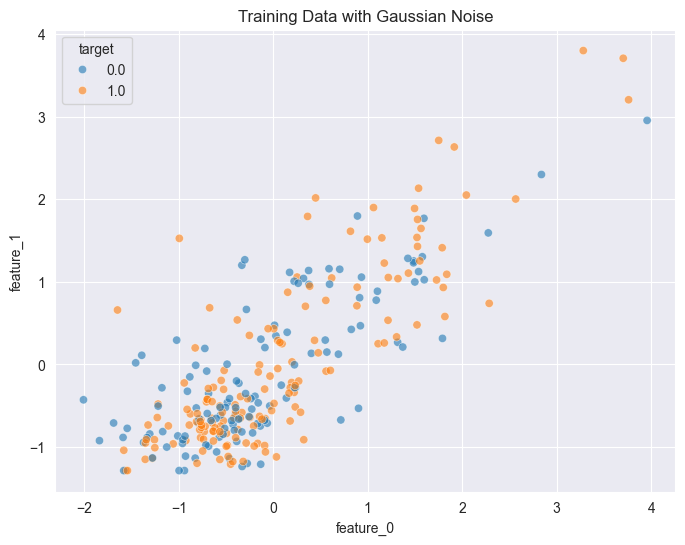

In [77]:
df_noisy = pd.DataFrame(x_train_noisy, columns=[f"feature_{i}" for i in range(x_train_noisy.shape[1])])
df_noisy['target'] = y_train_noisy

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_noisy, x='feature_0', y='feature_1', hue='target', palette='tab10', alpha=0.6)
plt.title("Training Data with Gaussian Noise")
plt.show()

# Task: 6

## **Strengths of SVM**

*  قوي جدا لما البيانات تكون مفصولة
* في انواع مختلف فادا بعطية مرونه فتشكيل ال SVM

## **Weaknesses of SVM**

* ضعيف جدا  وببقا في تصنيفات خطأ كتير بسبب ال Overlapping classes
* ببقا بطيىء لما يكون فيه degree عالية او gamma ييقا عالي ببقا بطيىء جداجدا
